In [30]:
import numpy as np 
import scipy.stats as st
import pymc as pm
import matplotlib.pyplot as plt 
import arviz as az 
import pickle 
import pytensor.tensor as pt

$$
\textbf{Data generation.}
$$
$$
X \sim \mathcal{N}(\mu_X, \sigma_X)
$$

$$
Y \sim \mathcal{N}(\mu_Y, \sigma_Y)
$$

$$
P(X, Y) = P(X) P(Y)
$$
$$
X_i^{\text{obs}} \sim \mathcal{N}(X_i, \sigma_{X_i}^{\text{obs}})
$$

$$
Y_i^{\text{obs}} \sim \mathcal{N}(Y_i, \sigma_{Y_i}^{\text{obs}})
$$
$$
P(X_i^{\text{obs}},Y_i^{\text{obs}})=P(X_i^{\text{obs}})P(Y_i^{\text{obs}})
$$

In [31]:
Nobs=10000

In [32]:
mu_t_x=0
mu_t_y=0
sigma_t_y=1
sigma_t_x=1
x=np.random.normal(mu_t_x,sigma_t_x,Nobs)
y=np.random.normal(mu_t_y,sigma_t_y,Nobs)

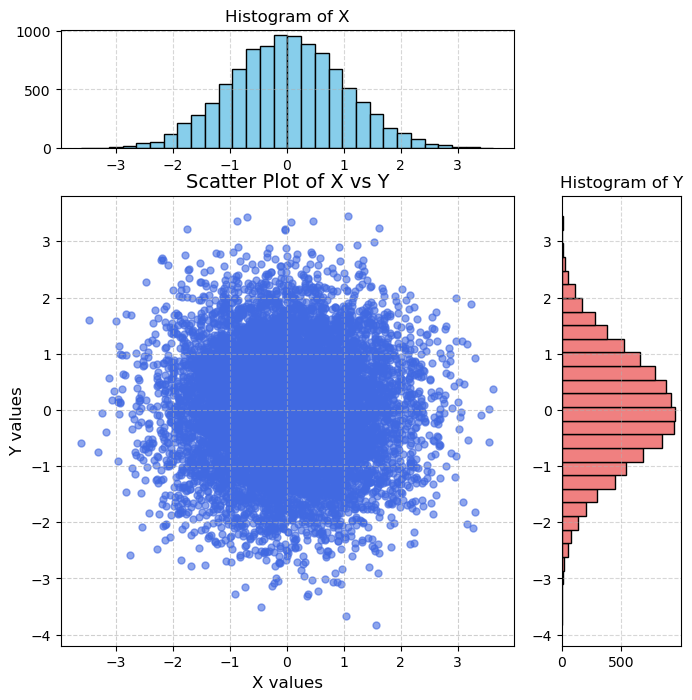

In [33]:

# Create figure and layout
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)

# Scatter plot
main_ax = fig.add_subplot(grid[1:4, 0:3])
main_ax.scatter(x, y, alpha=0.6, color='royalblue', s=25)
main_ax.set_title("Scatter Plot of X vs Y", fontsize=14)
main_ax.set_xlabel("X values", fontsize=12)
main_ax.set_ylabel("Y values", fontsize=12)
main_ax.grid(True, linestyle='--', alpha=0.6)

# Histogram of X (top)
x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
x_hist.hist(x, bins=30, color='skyblue', edgecolor='k')
x_hist.set_title("Histogram of X", fontsize=12)
x_hist.grid(True, linestyle='--', alpha=0.5)

# Histogram of Y (right)
y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
y_hist.hist(y, bins=30, orientation='horizontal', color='lightcoral', edgecolor='k')
y_hist.set_title("Histogram of Y", fontsize=12)
y_hist.grid(True, linestyle='--', alpha=0.5)

plt.show()


$$
\textbf{Now observed Quantities}
$$
$$
Y_i^{\text{obs}},X_i^{\text{obs}},\sigma_{Y_i}^{\text{obs}},\sigma_{X_i}^{\text{obs}}
$$
$$


In [34]:
x_obs=[]
y_obs=[]
sigma_obs_y=abs(np.random.normal(0,2,Nobs))*0+3
sigma_obs_x=abs(np.random.normal(0,2,Nobs))*0+3
for i in range(Nobs):
    x_obs.append(np.random.normal(x[i],sigma_obs_x[i]))
    y_obs.append(np.random.normal(y[i],sigma_obs_y[i]))

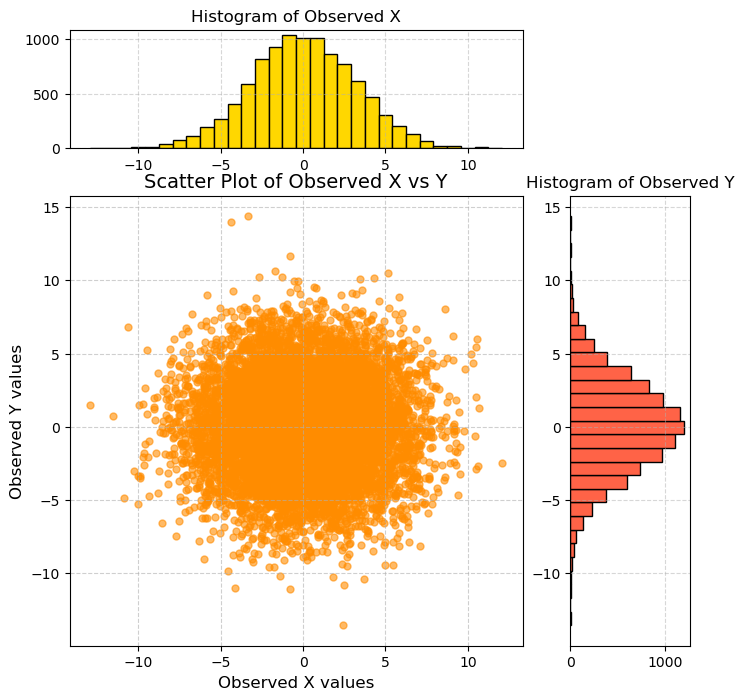

In [35]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[1:4, 0:3])
main_ax.scatter(x_obs, y_obs, alpha=0.6, color='darkorange', s=25)
main_ax.set_title("Scatter Plot of Observed X vs Y", fontsize=14)
main_ax.set_xlabel("Observed X values", fontsize=12)
main_ax.set_ylabel("Observed Y values", fontsize=12)
main_ax.grid(True, linestyle='--', alpha=0.6)

# Histogram of X_obs (top)
x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
x_hist.hist(x_obs, bins=30, color='gold', edgecolor='k')
x_hist.set_title("Histogram of Observed X", fontsize=12)
x_hist.grid(True, linestyle='--', alpha=0.5)

# Histogram of Y_obs (right)
y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)
y_hist.hist(y_obs, bins=30, orientation='horizontal', color='tomato', edgecolor='k')
y_hist.set_title("Histogram of Observed Y", fontsize=12)
y_hist.grid(True, linestyle='--', alpha=0.5)

plt.show()

<ErrorbarContainer object of 3 artists>

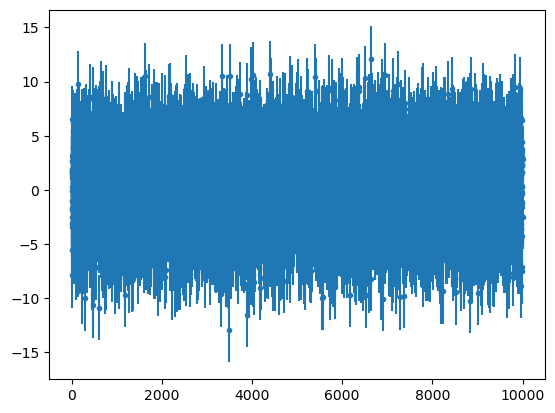

In [36]:
plt.errorbar(np.arange(0,Nobs,1), x_obs, yerr=sigma_obs_x, fmt='.', label='data')

<ErrorbarContainer object of 3 artists>

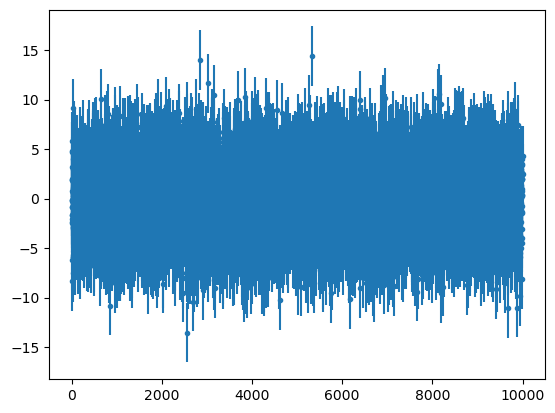

In [37]:
plt.errorbar(np.arange(0,Nobs,1), y_obs, yerr=sigma_obs_y, fmt='.', label='data')

$$
\textbf{Priors:}
$$
$$
\mu_X \sim \mathcal{U}(-5, 5)
$$

$$
\mu_Y \sim \mathcal{U}(-5, 5)
$$

$$
\sigma_X \sim \mathcal{U}(0, 10)
$$

$$
\sigma_Y \sim \mathcal{U}(0, 10)
$$

$$
\vec{\Omega} = (\mu_X, \mu_Y , \sigma_x , \sigma_y)
$$

$$
\mathcal{L}(x^{\text{obs}}, y^{\text{obs}} \mid \vec{\Omega}) = 
\prod_{i=1}^{N_{\text{obs}}}
\int \mathcal{N}_{X_i^{\text{obs}}}(x_i, \sigma_{x_i}^{\text{obs}})
     \mathcal{N}_{X_i}( \mu_X, \sigma_X) \, dx_i
\times
\int \mathcal{N}_{Y_i^{\text{obs}}}(y_i, \sigma_{y_i}^{\text{obs}})
     \mathcal{N}_{Y_i}(\mu_Y, \sigma_Y) \, dy_i
$$


$$
\mathcal{L}(x^{\text{obs}}, y^{\text{obs}} \mid \Omega) =
\prod_{i=1}^{N_{\text{obs}}}
\mathcal{N}_{x_i^{\text{obs}}}\left(\mu_X, \sqrt{(\sigma_{x_i}^{\text{obs}})^2 + \sigma_X^2}\right)
\mathcal{N}_{y_i^{\text{obs}}}\left(\mu_Y, \sqrt{(\sigma_{y_i}^{\text{obs}})^2 + \sigma_Y^2}\right)
$$
Posterior :
$$
P\left(\Omega \mid x^{\text{obs}}, y^{\text{obs}}, \sigma_y^{\text{obs}}, \sigma_x^{\text{obs}}\right)
\propto
P(\Omega) \, \mathcal{L}(x^{\text{obs}}, y^{\text{obs}} \mid \Omega)
$$
$$
P\left(\Omega \mid x^{\text{obs}}, y^{\text{obs}}, \sigma_y^{\text{obs}}, \sigma_x^{\text{obs}}\right)
\propto
P(\mu_X)P(\mu_Y) P(\sigma_X) P(\sigma_Y) \, \prod_{i=1}^{N_{\text{obs}}}
\mathcal{N}_{x_i^{\text{obs}}}\left(\mu_X, \sqrt{(\sigma_{x_i}^{\text{obs}})^2 + \sigma_X^2}\right)
\mathcal{N}_{y_i^{\text{obs}}}\left(\mu_Y, \sqrt{(\sigma_{y_i}^{\text{obs}})^2 + \sigma_Y^2}\right)
$$

In [38]:
with pm.Model() as model:
    mu_x=pm.Uniform("mu_x",-2,2)
    mu_y=pm.Uniform("mu_y",-5,5)
    sigma_x=pm.Uniform("sigma_x",0,5)
    sigma_y=pm.Uniform("sigma_y",0,5)
    sx=np.sqrt(sigma_obs_x**2+sigma_x**2)
    sy=np.sqrt(sigma_obs_y**2+sigma_y**2)
    obsx=pm.Normal("obsx",mu_x,sx,observed=x_obs)
    obsy=pm.Normal("obsy",mu_y,sy,observed=y_obs)
    
    trace = pm.sample(draws=1000, tune=1000, chains=4,cores=4,target_accept=0.95)

    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_x, mu_y, sigma_x, sigma_y]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 174 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_x,0.031,0.032,-0.026,0.094,0.000,0.000,5163.0,2851.0,1.0
mu_y,0.036,0.032,-0.020,0.100,0.000,0.000,5056.0,2694.0,1.0
sigma_x,1.028,0.070,0.896,1.164,0.001,0.001,4960.0,2599.0,1.0
sigma_y,0.911,0.077,0.773,1.055,0.001,0.001,5215.0,2587.0,1.0


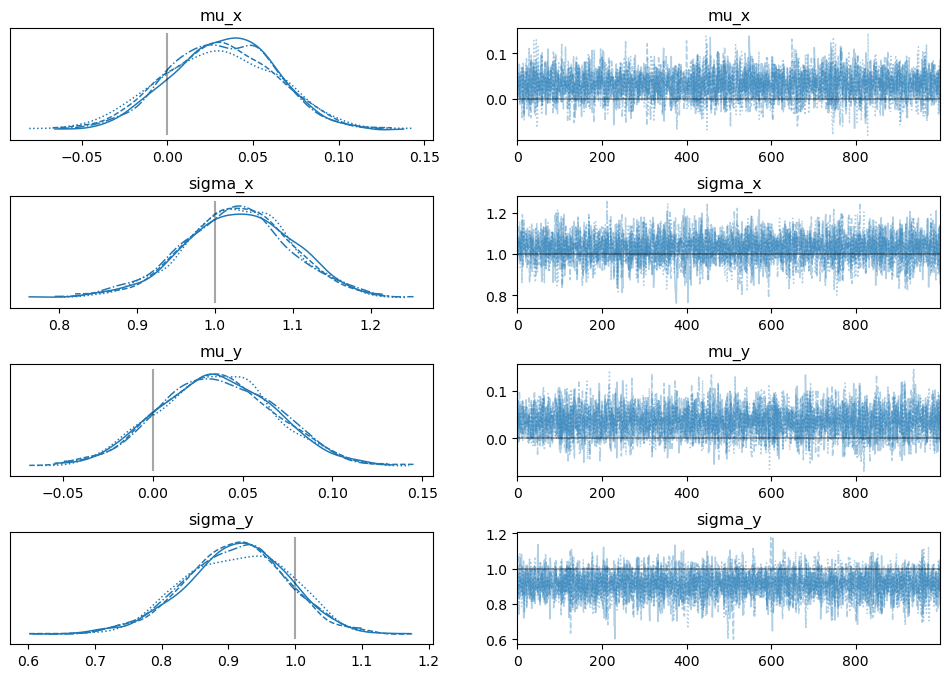

In [39]:
axes=az.plot_trace(            
        trace,
        compact=True,
        var_names=['mu_x', 'sigma_x','mu_y','sigma_y'],
        lines=[
            ('mu_x', {}, mu_t_x),         # original mu_P
            ('sigma_x', {}, sigma_t_x),   # original sigma_P
            ('mu_y', {}, mu_t_y),         # original mu_P
            ('sigma_y', {}, sigma_t_y),   # original sigma_P

        ]
    )
fig = axes.ravel()[0].figure.subplots_adjust(hspace=0.5)
az.summary(trace)